In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
/device:GPU:0
Found GPU at: /device:GPU:0


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
pip install tensorflow==2.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 105.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.1.21
    Uninstalling flatbuffers-23.1.21:
      Successfully uninstalled flatbuffers-23.1.21
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully 

In [ ]:
#tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import Sequential
from keras.layers.pooling import AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D
from tensorflow.keras.layers import Flatten, Dense,BatchNormalization,Dropout,Input, ZeroPadding2D
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential, Model
import keras.backend as K
from sklearn.metrics import log_loss
# Utils
import os
import cv2
from sklearn.utils import shuffle
from pathlib import Path
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import time

#mount drive
from google.colab import drive
drive.mount("/content/drive")

#Evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score


# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
from glob import glob
import random



Mounted at /content/drive


In [ ]:
def img_Generator(file_name,gen_type,size):
    if gen_type=='yes':
        generet_Data=ImageDataGenerator(rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
        gen_data=generet_Data.flow_from_directory(file_name,target_size=(size, size),
                                                  batch_size=32,shuffle=True,
                                                  class_mode='categorical')

    else:
        generet_Data1=ImageDataGenerator()
        gen_data=generet_Data1.flow_from_directory(file_name,target_size=(size, size),
                                                  batch_size=32,shuffle=False,
                                                  class_mode='categorical')

    return gen_data

In [ ]:
#EfficientNetB4
efficientnet_size=380
image_path=Path('/content/drive/MyDrive/TA/Data/0_3_Split')
data_typ='yes'
train_data=img_Generator(str(image_path)+'/train/',data_typ,efficientnet_size)
data_typ='no'
test_data=img_Generator(str(image_path)+'/test/',data_typ,efficientnet_size)

Found 2876 images belonging to 10 classes.
Found 1193 images belonging to 10 classes.


In [16]:
import os

def count_files(directory):
    file_count = 0

    for _, _, files in os.walk(directory):
        file_count += len(files)

    return file_count

# Example usage
directory_path = str(image_path)+'/train/sate'  # Replace with the actual directory path
directory_path_2 = str(image_path)+'/test/sate'  # Replace with the actual directory path

total_files = count_files(directory_path)

total_files_2 = count_files(directory_path_2)
print(f"Total files in train directory: {total_files}")
print(f"Total files in test directory: {total_files_2}")

print(f"Total files in directory: {total_files+total_files_2}")


Total files in train directory: 355
Total files in test directory: 154
Total files in directory: 509


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early = EarlyStopping(monitor="loss", mode="min",min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [ ]:
efficientnet_base_model = EfficientNetB4(include_top=False, weights='imagenet',input_tensor=None, input_shape=(efficientnet_size,efficientnet_size,3), classes=10)

71686520/71686520 [==============================] - 3s 0us/step


In [ ]:
print("weights:", len(efficientnet_base_model.weights))
print("trainable_weights:", len(efficientnet_base_model.trainable_weights))
print("non_trainable_weights:", len(efficientnet_base_model.non_trainable_weights))

weights: 611
trainable_weights: 416
non_trainable_weights: 195


In [ ]:
efficientnet_base_model.summary()

In [ ]:
int(10/100*611)

61

In [ ]:
for layer in efficientnet_base_model.layers:
  print(layer)
  print(layer.trainable)


In [ ]:
#remove few dense layer from model
for layer in efficientnet_base_model.layers:
  layer.trainable = False
# for layer in efficientnet_base_model.layers[-183:]:
#     if not isinstance(layer, layers.BatchNormalization) and isinstance(layer, layers.GlobalAveragePooling2D):
#       layer.trainable = True
for layer in efficientnet_base_model.layers[-61:]:
  layer.trainable = True

In [ ]:
print("weights:", len(efficientnet_base_model.weights))
print("trainable_weights:", len(efficientnet_base_model.trainable_weights))
print("non_trainable_weights:", len(efficientnet_base_model.non_trainable_weights))

weights: 611
trainable_weights: 55
non_trainable_weights: 556


In [ ]:
efficentmodel = Sequential()
efficentmodel.add(efficientnet_base_model)
efficentmodel.add(layers.Flatten())
# efficentmodel.add(layers.Dense(1024 ,activation='relu'))
# efficentmodel.add(BatchNormalization())
efficentmodel.add(layers.Dense(10, activation ='softmax'))
efficentmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 12, 12, 1792)     17673823  
                                                                 
 flatten (Flatten)           (None, 258048)            0         
                                                                 
 dense (Dense)               (None, 10)                2580490   
                                                                 
Total params: 20,254,313
Trainable params: 10,175,558
Non-trainable params: 10,078,755
_________________________________________________________________


In [ ]:
efficentmodel.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
batch_size = 32
# Training model
n_training_samples = len(train_data)
t0 = time.time()
efficient_history = efficentmodel.fit(
    train_data,
    epochs=200,
    # steps_per_epoch =(n_training_samples//batch_size)*2,
    shuffle = True,
    callbacks=callbacks_list
    )
record_time =time.time()-t0
print("Training time:", record_time)

Epoch 1/200
90/90 [==============================] - 1352s 15s/step - loss: 6.4896 - accuracy: 0.5810 - lr: 0.0010
Epoch 2/200
90/90 [==============================] - 130s 1s/step - loss: 4.5986 - accuracy: 0.7615 - lr: 0.0010
Epoch 3/200
90/90 [==============================] - 128s 1s/step - loss: 4.2545 - accuracy: 0.8102 - lr: 0.0010
Epoch 4/200
90/90 [==============================] - 127s 1s/step - loss: 4.0084 - accuracy: 0.8355 - lr: 0.0010
Epoch 5/200
90/90 [==============================] - 128s 1s/step - loss: 3.7359 - accuracy: 0.8689 - lr: 0.0010
Epoch 6/200
90/90 [==============================] - 128s 1s/step - loss: 3.3048 - accuracy: 0.8842 - lr: 0.0010
Epoch 7/200
90/90 [==============================] - 129s 1s/step - loss: 3.2812 - accuracy: 0.8936 - lr: 0.0010
Epoch 8/200
90/90 [==============================] - 128s 1s/step - loss: 3.3720 - accuracy: 0.9030 - lr: 0.0010
Epoch 9/200
90/90 [==============================] - 128s 1s/step - loss: 3.1577 - accuracy: 0

In [ ]:
#save the model
efficentmodel.save('/content/drive/MyDrive/TA/Models/EfficientNet/EfficientNet_Rmsprop_10')

In [ ]:
efficentmodel = tf.keras.models.load_model('/content/drive/MyDrive/TA/Models/EfficientNet/EfficientNet_Rmsprop_10')

40/40 [==============================] - 586s 15s/step


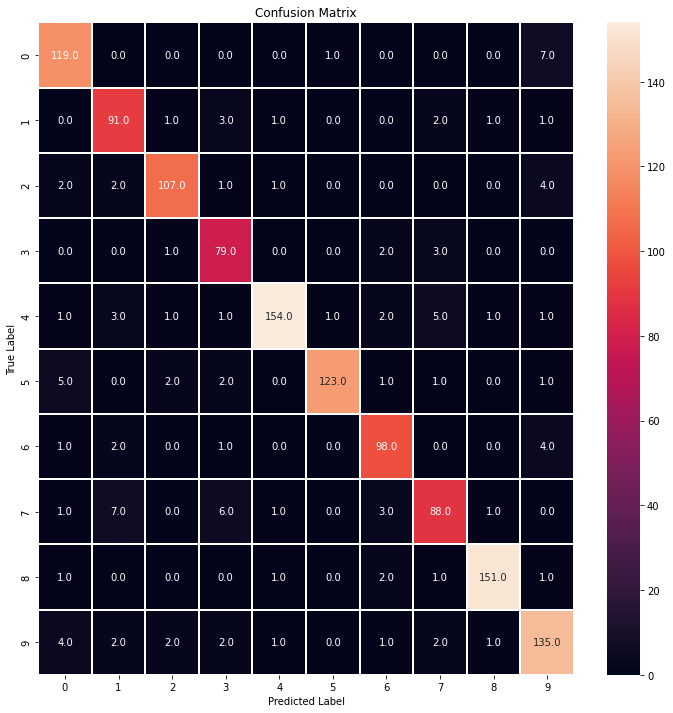

In [ ]:
y_val = test_data.classes
y_pred = efficentmodel.predict(test_data)
y_pred = np.argmax(y_pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, y_val)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True,
            linewidths=0.01,
            linecolor="white",
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# ax.xaxis.set_ticklabels(test_data.class_indices)
# ax.yaxis.set_ticklabels(rice_classes)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
FP_FN=[]
for i,j,k in zip(test_data.filenames, y_val, y_pred):
  if j!=k:
    FP_FN.append(i)

FP_FN

['bakso/pic_080.jpg',
 'bakso/pic_104.jpg',
 'bakso/pic_233.jpg',
 'bakso/pic_244.jpg',
 'bakso/pic_254.jpg',
 'bakso/pic_278.jpg',
 'bakso/pic_315.jpg',
 'bakso/pic_353.jpg',
 'bakso/pic_355.jpg',
 'bakso/pic_361.jpg',
 'bakso/pic_367.jpg',
 'bakso/pic_402.jpg',
 'bakso/pic_407.jpg',
 'bakso/pic_442.jpg',
 'bakso/pic_443.jpg',
 'bebek_betutu/bebek_betutu_092.jpg',
 'bebek_betutu/bebek_betutu_199.jpg',
 'bebek_betutu/bebek_betutu_210.jpg',
 'bebek_betutu/bebek_betutu_242.jpg',
 'bebek_betutu/bebek_betutu_282.jpg',
 'bebek_betutu/bebek_betutu_284.jpg',
 'bebek_betutu/bebek_betutu_304.jpg',
 'bebek_betutu/bebek_betutu_326.jpg',
 'bebek_betutu/bebek_betutu_343.jpg',
 'bebek_betutu/bebek_betutu_351.jpg',
 'bebek_betutu/bebek_betutu_358.jpg',
 'bebek_betutu/bebek_betutu_404.jpg',
 'bebek_betutu/bebek_betutu_413.jpg',
 'bebek_betutu/bebek_betutu_443.jpg',
 'bebek_betutu/bebek_betutu_461.jpg',
 'bebek_betutu/bebek_betutu_477.jpg',
 'gado_gado/pic_104.jpg',
 'gado_gado/pic_119.jpg',
 'gado_gad

In [ ]:
len(FP_FN)

109

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_pred, y_val)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_pred, y_val, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_pred, y_val, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_pred, y_val, average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.913078
Precision: 0.907390
Recall: 0.911668
F1 score: 0.908745
